# TensorFlow and Keras

In [1]:
#Uncomment and use it
!pip install tensorflow

Defaulting to user installation because normal site-packages is not writeable


In [2]:
!pip show tensorflow

Name: tensorflow
Version: 2.16.1
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: /home/arun/.local/lib/python3.10/site-packages
Requires: absl-py, astunparse, flatbuffers, gast, google-pasta, grpcio, h5py, keras, libclang, ml-dtypes, numpy, opt-einsum, packaging, protobuf, requests, setuptools, six, tensorboard, tensorflow-io-gcs-filesystem, termcolor, typing-extensions, wrapt
Required-by: 


In [3]:
!pip install tensorflow
import tensorflow as tf
%matplotlib inline  

Defaulting to user installation because normal site-packages is not writeable


2024-05-15 16:29:06.829830: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-15 16:29:07.848861: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


## Tensors

#### Constants

tf.constant creates constant values, these values do not change
or update during optimization process(training phase)

In [4]:
a = tf.constant([50,10])
print(a)

tf.Tensor([50 10], shape=(2,), dtype=int32)


Few things that we can do with the tensors at the runtime:
1. Directly get a numpy value of the tensor
2. dtype : data type of the tensor(int16/int32/float32/float64)
3. shape: shape of the tensor

In [5]:
print('a in tensorflow ==>', a)
print('numpy value of a ==>', a.numpy())
print('dtype of a ==>', a.dtype)
print('shape of a ==>', a.shape)

a in tensorflow ==> tf.Tensor([50 10], shape=(2,), dtype=int32)
numpy value of a ==> [50 10]
dtype of a ==> <dtype: 'int32'>
shape of a ==> (2,)


We can use inbuild tf.XX() function to create constant tensors, just like numpy.

In [6]:
print('Tensor of Ones: \n',tf.ones(shape=(2, 2)))
print('Tensor of Zeros: \n',tf.zeros(shape=(2, 2)))
print('Random normal values \n', tf.random.normal(shape=(3, 2),
                                                  mean=5, 
                                                  stddev=1))

Tensor of Ones: 
 tf.Tensor(
[[1. 1.]
 [1. 1.]], shape=(2, 2), dtype=float32)
Tensor of Zeros: 
 tf.Tensor(
[[0. 0.]
 [0. 0.]], shape=(2, 2), dtype=float32)
Random normal values 
 tf.Tensor(
[[5.298804  5.058243 ]
 [5.375495  3.7058806]
 [7.3324537 5.6382113]], shape=(3, 2), dtype=float32)


### Variables

We generally create a variable with some values, call it initialized values, 
convert this constant tensor into a variable and then mutate the variable by using special functions.

In [7]:
x = tf.Variable(5) # Simple variable
print(x)

<tf.Variable 'Variable:0' shape=() dtype=int32, numpy=5>


In [8]:
#randomly initialized variable, like we need for our weights
w = tf.Variable(tf.random.normal(shape=(2, 2))) 
print(w)

<tf.Variable 'Variable:0' shape=(2, 2) dtype=float32, numpy=
array([[ 0.5630394 , -1.0993019 ],
       [-1.5107332 ,  0.23664786]], dtype=float32)>


In [9]:
m = tf.Variable(5) # Simple variable
print(m)

m = tf.Variable(5) 
print('New value', m.assign(2))

m = tf.Variable(5) 
print('increment by 1', m.assign_add(1))

m = tf.Variable(5) 
print('Decrement by 2', m.assign_sub(2))


<tf.Variable 'Variable:0' shape=() dtype=int32, numpy=5>
New value <tf.Variable 'UnreadVariable' shape=() dtype=int32, numpy=2>
increment by 1 <tf.Variable 'UnreadVariable' shape=() dtype=int32, numpy=6>
Decrement by 2 <tf.Variable 'UnreadVariable' shape=() dtype=int32, numpy=3>


### Regression Model building in TensorFlow

#This step is for data creation, x and y

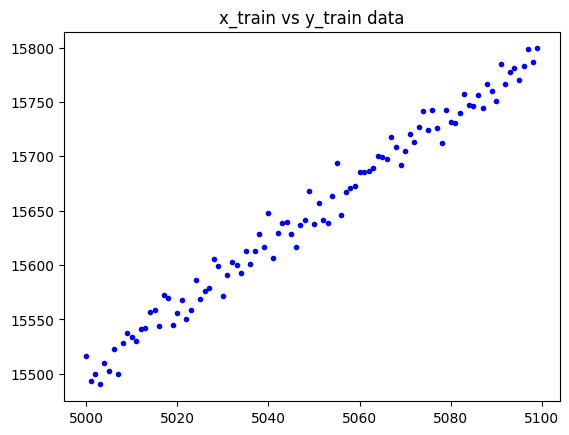

In [10]:
#This step is for data creation, x and y
import numpy as np
x_train= np.array(range(5000,5100)).reshape(-1,1)


y_train=[3*i+np.random.normal(500, 10) for i in x_train]

import matplotlib.pyplot as plt
plt.title("x_train vs y_train data")
plt.plot(x_train, y_train, 'b.')
plt.show()

In [11]:
#Model y=X*W + b
#Model function
def output(x):
    return W*x + b

#Loss function Reduce mean square
def loss_function(y_pred, y_true):
    return tf.reduce_mean(tf.square(y_pred - y_true))

#Initialize Weights
W = tf.Variable(tf.random.uniform(shape=(1, 1)))
b = tf.Variable(tf.ones(shape=(1,)))

#Optimization
## Writing training/learing loop with GradienTape
learning_rate = 0.000000001
steps = 200 #epochs

for i in range(steps):
    with tf.GradientTape() as tape:
        predictions = output(x_train)
        loss = loss_function(predictions,y_train)
        dloss_dw, dloss_db = tape.gradient(loss, [W, b])
    W.assign_sub(learning_rate * dloss_dw)
    b.assign_sub(learning_rate * dloss_db)
    print(f"epoch : {i}, loss  {loss.numpy()},  W : {W.numpy()}, b  {b.numpy()}")

epoch : 0, loss  240361552.0,  W : [[0.18503849]], b  [1.000031]
epoch : 1, loss  216471456.0,  W : [[0.33362713]], b  [1.0000604]
epoch : 2, loss  194955840.0,  W : [[0.47463828]], b  [1.0000883]
epoch : 3, loss  175578688.0,  W : [[0.60845834]], b  [1.0001148]
epoch : 4, loss  158127504.0,  W : [[0.735454]], b  [1.00014]
epoch : 5, loss  142410816.0,  W : [[0.85597336]], b  [1.0001638]
epoch : 6, loss  128256280.0,  W : [[0.9703466]], b  [1.0001864]
epoch : 7, loss  115508592.0,  W : [[1.0788872]], b  [1.0002079]
epoch : 8, loss  104027928.0,  W : [[1.1818926]], b  [1.0002283]
epoch : 9, loss  93688344.0,  W : [[1.2796451]], b  [1.0002476]
epoch : 10, loss  84376432.0,  W : [[1.3724126]], b  [1.000266]
epoch : 11, loss  75990064.0,  W : [[1.4604492]], b  [1.0002834]
epoch : 12, loss  68437232.0,  W : [[1.5439963]], b  [1.0002999]
epoch : 13, loss  61635096.0,  W : [[1.6232828]], b  [1.0003157]
epoch : 14, loss  55509052.0,  W : [[1.6985259]], b  [1.0003306]
epoch : 15, loss  49991888

Final Weights

In [12]:
print('w ', W)
print('b ', b)

w  <tf.Variable 'Variable:0' shape=(1, 1) dtype=float32, numpy=array([[3.0986502]], dtype=float32)>
b  <tf.Variable 'Variable:0' shape=(1,) dtype=float32, numpy=array([1.000607], dtype=float32)>


Plotting

epoch is: 0, loss is 227384848.0,  W is: [[0.2647825]], b is [1.0000302]


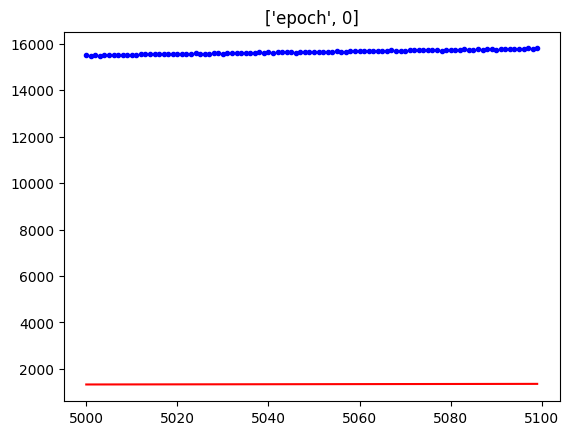

epoch is: 30, loss is 9836365.0,  W is: [[2.5093153]], b is [1.0004746]


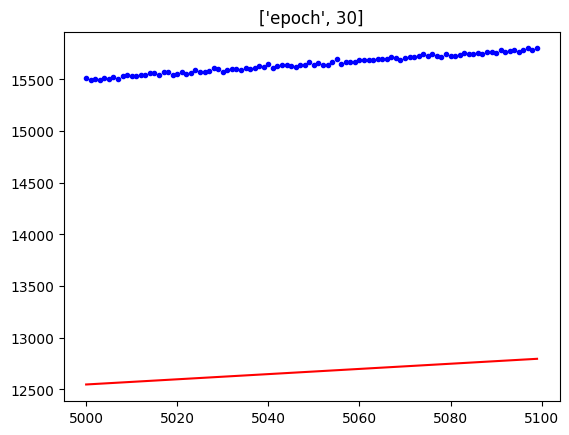

epoch is: 60, loss is 425639.625,  W is: [[2.976146]], b is [1.0005672]


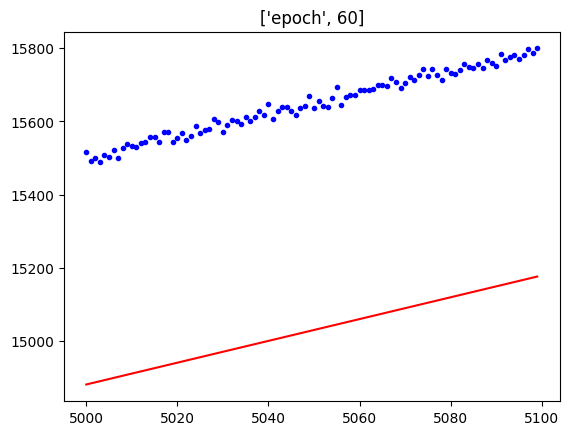

epoch is: 90, loss is 18549.689453125,  W is: [[3.0732403]], b is [1.0005863]


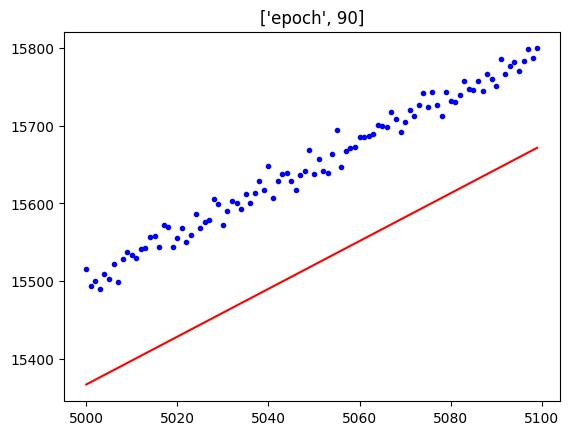

epoch is: 120, loss is 940.0525512695312,  W is: [[3.093434]], b is [1.0005904]


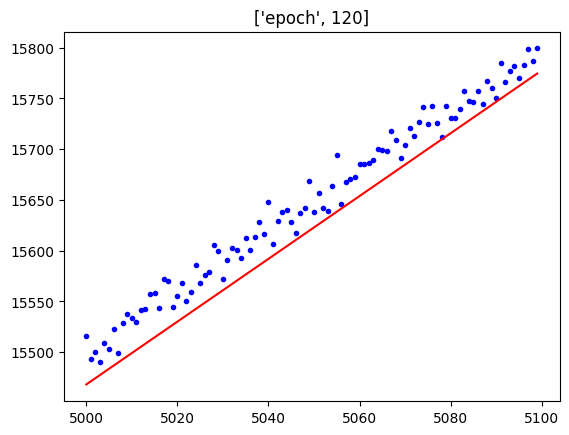

epoch is: 150, loss is 178.26519775390625,  W is: [[3.0976343]], b is [1.0005904]


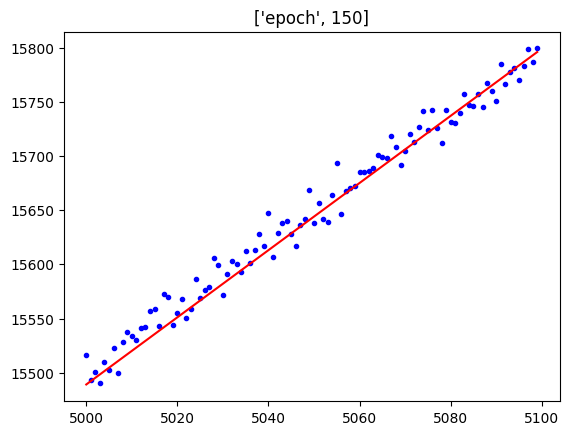

epoch is: 180, loss is 145.30615234375,  W is: [[3.098508]], b is [1.0005904]


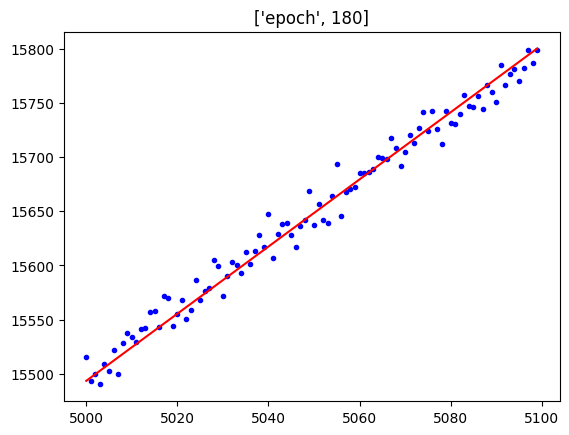

In [13]:
#Initialize Weights
W = tf.Variable(tf.random.uniform(shape=(1, 1)))
b = tf.Variable(tf.ones(shape=(1,)))

#Optimization
## Writing training/learing loop with GradienTape
learning_rate = 0.000000001
steps = 200 #epochs

for i in range(steps):
    with tf.GradientTape() as tape:
        predictions = output(x_train)
        loss = loss_function(predictions,y_train)
        dloss_dw, dloss_db = tape.gradient(loss, [W, b])
    W.assign_sub(learning_rate * dloss_dw)
    b.assign_sub(learning_rate * dloss_db)
    if i%30 == 0:
        print(f"epoch is: {i}, loss is {loss.numpy()},  W is: {W.numpy()}, b is {b.numpy()}")
        plt.title(["epoch", i])
        plt.plot(x_train, y_train, 'b.')
        plt.plot(x_train, output(x_train), c='r')
        plt.show()

### Logistic Regression Model building in TensorFlow

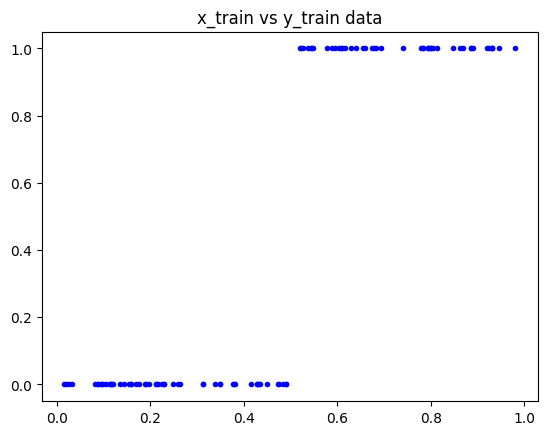

In [14]:
# This step is for data creation
x_train= np.random.rand(100,1)
y_train=np.array([0 if i < 0.5 else 1 for i in x_train]).reshape(-1,1)

import matplotlib.pyplot as plt
plt.title("x_train vs y_train data")
plt.plot(x_train, y_train, 'b.',)
plt.show()

In [15]:
#Model y=sigmoid(X*W + b)
# same as the linear regression just sigmoid wrapped around the linear equation
def output(x): 
    return tf.sigmoid(W*x + b)

#Loss function : sum of squares
def loss_function(y_pred, y_true):
    return tf.reduce_sum(tf.square(y_pred - y_true))

#Initialize Weights
W = tf.Variable(tf.random.uniform(shape=(1, 1)))
b = tf.Variable(tf.zeros(shape=(1,)))

## Optimization
learning_rate = 0.1
steps = 300 #epochs

for i in range(steps):
    with tf.GradientTape() as tape:
        predictions = output(x_train)
        loss = loss_function(y_train, predictions)
        dloss_dw, dloss_db = tape.gradient(loss, [W, b])
    W.assign_sub(learning_rate * dloss_dw)
    b.assign_sub(learning_rate * dloss_db)
    print(f"epoch : {i}, loss  {loss.numpy()},  W : {W.numpy()}, b  {b.numpy()}")

epoch : 0, loss  22.344324111938477,  W : [[0.93079424]], b  [-0.6425048]
epoch : 1, loss  19.647998809814453,  W : [[1.4834684]], b  [-0.5442965]
epoch : 2, loss  17.581317901611328,  W : [[1.7317712]], b  [-0.95878386]
epoch : 3, loss  15.934826850891113,  W : [[2.1528206]], b  [-0.9374849]
epoch : 4, loss  14.605300903320312,  W : [[2.37928]], b  [-1.2294577]
epoch : 5, loss  13.517671585083008,  W : [[2.7032669]], b  [-1.2571759]
epoch : 6, loss  12.622550010681152,  W : [[2.9140408]], b  [-1.4549057]
epoch : 7, loss  11.87672233581543,  W : [[3.166131]], b  [-1.5192267]
epoch : 8, loss  11.248515129089355,  W : [[3.3623805]], b  [-1.6531304]
epoch : 9, loss  10.712298393249512,  W : [[3.5664713]], b  [-1.7338738]
epoch : 10, loss  10.249092102050781,  W : [[3.745363]], b  [-1.8329425]
epoch : 11, loss  9.844647407531738,  W : [[3.9189887]], b  [-1.914102]
epoch : 12, loss  9.48828125,  W : [[4.0798073]], b  [-1.9959183]
epoch : 13, loss  9.171781539916992,  W : [[4.2328806]], b  [

Plotting

epoch is: 0, loss is 23.177770614624023,  W is: [[0.76734304]], b is [-0.4583521]


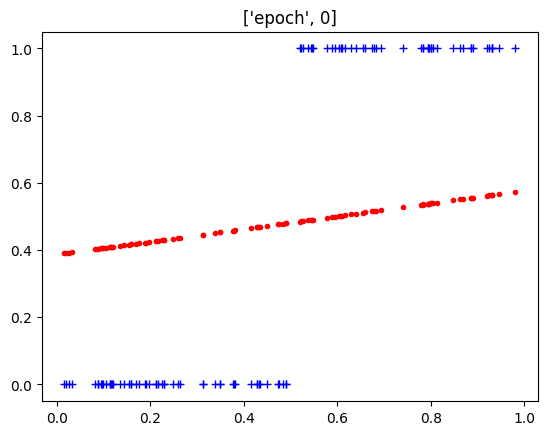

epoch is: 40, loss is 5.888037204742432,  W is: [[6.730428]], b is [-3.317014]


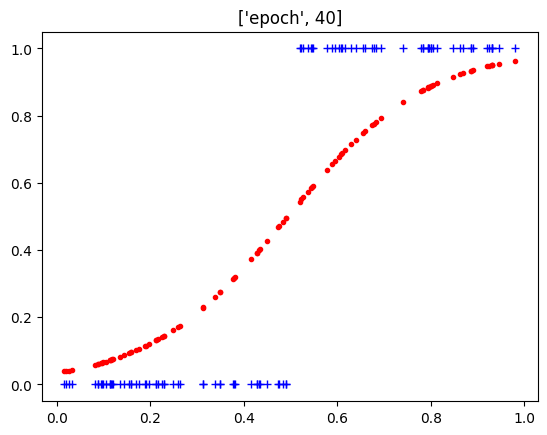

epoch is: 80, loss is 4.6165571212768555,  W is: [[8.702077]], b is [-4.3121724]


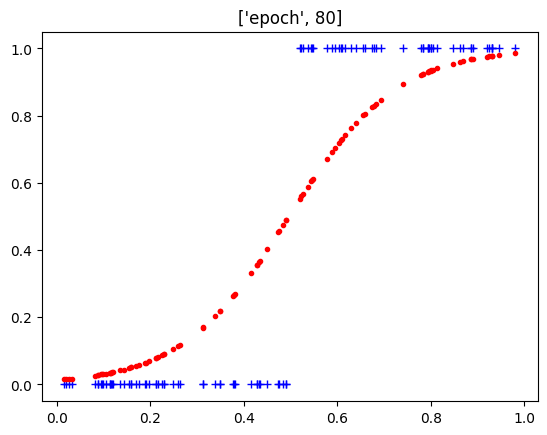

epoch is: 120, loss is 4.033353328704834,  W is: [[10.052374]], b is [-4.9977546]


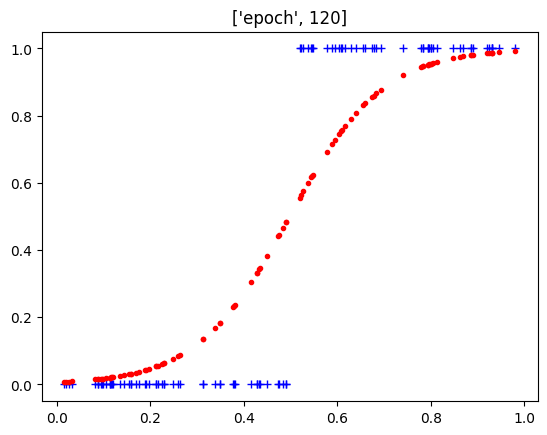

epoch is: 160, loss is 3.6674282550811768,  W is: [[11.125176]], b is [-5.543594]


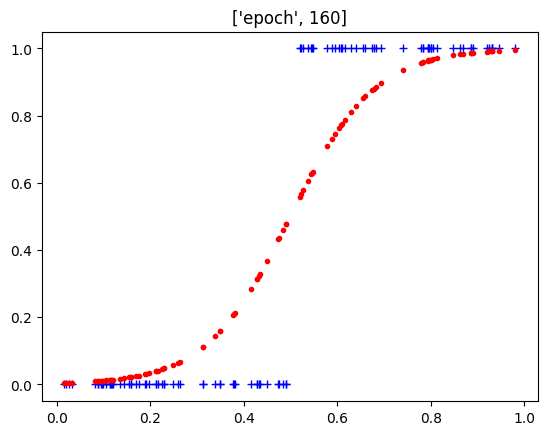

epoch is: 200, loss is 3.405374526977539,  W is: [[12.034267]], b is [-6.0064807]


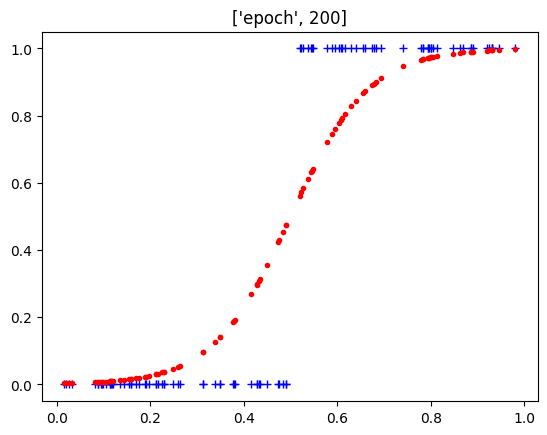

epoch is: 240, loss is 3.2035627365112305,  W is: [[12.832682]], b is [-6.4130797]


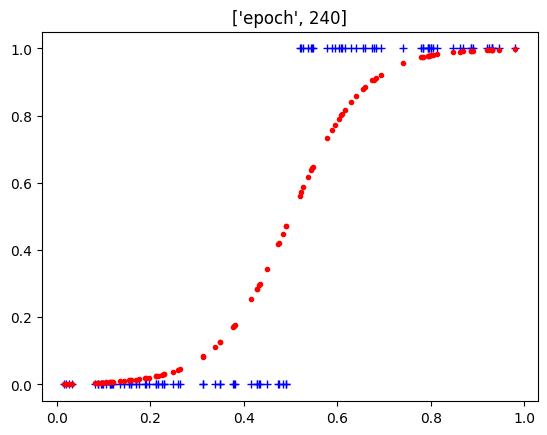

epoch is: 280, loss is 3.0408382415771484,  W is: [[13.550005]], b is [-6.7783465]


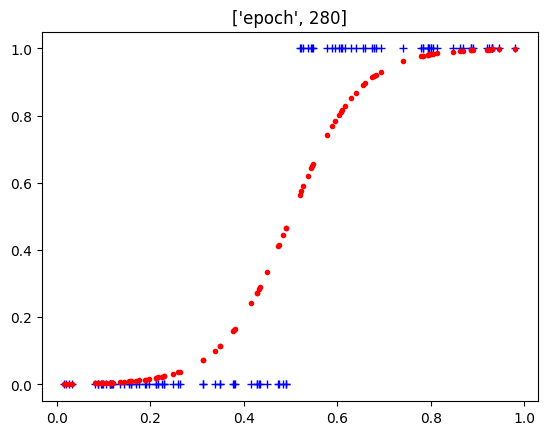

In [16]:
#Model y=X*W + b
# same as the linear regression just sigmoid wrapped around the linear equation
def output(x): 
    return tf.sigmoid(W*x + b)

#Loss function : sum of squares
def loss_function(y_pred, y_true):
    return tf.reduce_sum(tf.square(y_pred - y_true))

#Initialize Weights
W = tf.Variable(tf.random.uniform(shape=(1, 1)))
b = tf.Variable(tf.zeros(shape=(1,)))

## Optimization
learning_rate = 0.1
steps = 300 #epochs

for i in range(steps):
    with tf.GradientTape() as tape:
        predictions = output(x_train)
        loss = loss_function(y_train, predictions)
        dloss_dw, dloss_db = tape.gradient(loss, [W, b])
    W.assign_sub(learning_rate * dloss_dw)
    b.assign_sub(learning_rate * dloss_db)

    if i%40 == 0:
        print(f"epoch is: {i}, loss is {loss.numpy()},  W is: {W.numpy()}, b is {b.numpy()}")
        plt.title(["epoch", i])
        plt.plot(x_train, y_train, 'b+')
        plt.plot(x_train, output(x_train), '.', c='r')
        plt.show()

# Keras

In [17]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [18]:
## The data, shuffled and split between train and test sets
(X_train, Y_train), (X_test, Y_test) = keras.datasets.mnist.load_data()
num_classes=10
x_train = X_train.reshape(60000, 784)
x_test = X_test.reshape(10000, 784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

## Convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(Y_train, num_classes)
y_test = keras.utils.to_categorical(Y_test, num_classes)

print(x_train.shape, 'train input samples')
print(x_test.shape, 'test input samples')

print(y_train.shape, 'train output samples')
print(y_test.shape, 'test output samples')

(60000, 784) train input samples
(10000, 784) test input samples
(60000, 10) train output samples
(10000, 10) test output samples


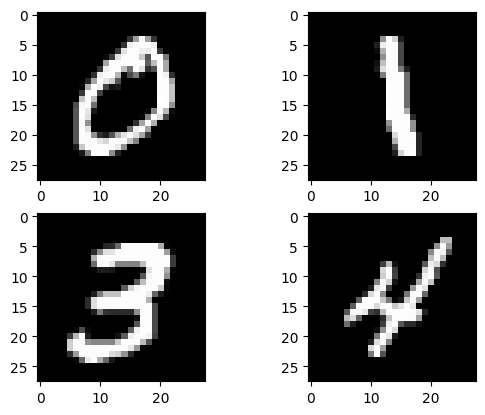

In [19]:
# Plot 4 images as gray scale

%matplotlib inline
import matplotlib.pyplot as plt
plt.subplot(221)
plt.imshow(X_train[1], cmap=plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(X_train[6], cmap=plt.get_cmap('gray'))
plt.subplot(223)
plt.imshow(X_train[7], cmap=plt.get_cmap('gray'))
plt.subplot(224)
plt.imshow(X_train[9], cmap=plt.get_cmap('gray'))

# show the plot
plt.show()

In [20]:
model = keras.Sequential()
#Input Layer. The model needs to know what input shape it should expect. 
#For this reason, the first layer in a Sequential model needs to receive information about its input shape.
#Only the first need the snape information, because following layers can do automatic shape inference
model.add(layers.Dense(20, activation='sigmoid', input_shape=(784,)))

#The dense layer is simply a layer where each unit or neuron is connected to each neuron in the next layer.
model.add(layers.Dense(20, activation='sigmoid'))

#In the final layer mention the output classes
model.add(layers.Dense(10, activation='softmax'))

#Model Summary
model.summary()

/home/arun/.local/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 20)             │        15,700 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 20)             │           420 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           210 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16,330 (63.79 KB)

 Trainable params: 16,330 (63.79 KB)

 Non-trainable params: 0 (0.00 B)

In [21]:
# Compiling model : we define loss function, optimizer and validation matric of our choice
model.compile(loss='categorical_crossentropy', metrics=['accuracy'])

# Fit method: actually running our model by supplying our input and validation data
model.fit(x_train, y_train,epochs=10)

Epoch 1/10


2024-05-15 16:29:14.620945: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 188160000 exceeds 10% of free system memory.


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.5923 - loss: 1.5241
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 942us/step - accuracy: 0.8974 - loss: 0.3976
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9198 - loss: 0.2774
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 930us/step - accuracy: 0.9344 - loss: 0.2259
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9425 - loss: 0.1985
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 926us/step - accuracy: 0.9474 - loss: 0.1777
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 994us/step - accuracy: 0.9499 - loss: 0.1704
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 954us/step - accuracy: 0.9547 - loss: 0.1581
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9575 - loss: 0.1457
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 996us/step - accuracy: 0.9591 - loss: 0.1410


In [22]:
print(model.get_weights())

[array([[-0.08354776,  0.00748366,  0.08282864, ..., -0.08290439,
        -0.00060739,  0.05448481],
       [-0.03122295, -0.0614166 , -0.07016076, ...,  0.06781819,
         0.00038453, -0.01488946],
       [ 0.06284529, -0.01377457,  0.06377245, ...,  0.00031345,
        -0.04773028, -0.07875499],
       ...,
       [ 0.02798665, -0.07288797,  0.00791071, ...,  0.02847701,
        -0.02413161,  0.07847229],
       [ 0.0540739 , -0.05900688,  0.01145171, ..., -0.07068669,
        -0.03970374, -0.0783136 ],
       [ 0.00742259, -0.07629253,  0.06373048, ...,  0.05806503,
        -0.07797279, -0.01587009]], dtype=float32), array([-0.5392996 ,  0.5499376 ,  0.38571957, -0.16653377,  0.20537762,
       -0.32788035, -0.12435617, -0.14614598, -0.53419745,  0.12176263,
        0.50456625, -0.26752785, -0.1308865 ,  0.10966358,  0.22267027,
        0.43985102, -0.5480332 , -0.34128252, -0.19881478,  0.2834832 ],
      dtype=float32), array([[ 1.0952352 ,  0.11687673,  0.08868434,  1.203926  ,

In [23]:
loss, acc = model.evaluate(x_test,  y_test, verbose=2)
print("Test Accuracy: {:5.2f}%".format(100*acc))

2024-05-15 16:29:34.145920: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 31360000 exceeds 10% of free system memory.


313/313 - 0s - 858us/step - accuracy: 0.9545 - loss: 0.1574
Test Accuracy: 95.45%
